In [2]:
import wfdb.io.convert
import mne
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
file_indicies = ['02','03','05','06', '07', '09', '10', '12', '14', '15', '17', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28' ]

for idx in file_indicies:
    rec_path = f"vincent-apnea-ecg/ucddb0{idx}.rec"

    record = wfdb.io.convert.read_edf(rec_path)
    channel_index = record.sig_name.index("SpO2")
    channel_data = record.p_signal[:, channel_index]
    intervals = []
    for i in range(0, len(channel_data) - 88 + 1):
        if((i * 11) + 88 >= len(channel_data)):
            break
        curr_interval = channel_data[11* i:(11* i) + 88]
        intervals.append(curr_interval)
    spo2_intervals = np.stack(intervals, axis=0)

    spo2_df = pd.DataFrame(spo2_intervals, columns=np.arange(1, 89, 1))
    spo2_df["start_time_plus_5.5"] = spo2_df.index + 5.5
    spo2_df["apnea"] = False
    

    ann_path = f"vincent-apnea-ecg/ucddb0{idx}_respevt.txt"

    timestamps = []
    with open(ann_path, 'r', encoding='utf-8') as file:
        for line in file:
            if "Change" in line:
                break
    
    
        for line in file:
            if line == "\x1a":
                continue
            fields = line.split()

            if "APNEA" not in fields[1]:
                continue
            timestamp = fields[0]
            duration = fields[2]
            
            h, m, s = timestamp.split(':')
            h, m, s = int(h), int(m), int(s)
    
            timestamp_sec = h * 3600 + m * 60 + s
            timestamps.append((timestamp_sec, int(duration)))

    #print(timestamps)
    for timestamp in timestamps:
        spo2_df["apnea"] = (spo2_df["apnea"]) | ((spo2_df["start_time_plus_5.5"] >= timestamp[0]) & (spo2_df["start_time_plus_5.5"] <= timestamp[0] + timestamp[1]))
    spo2_df = spo2_df.drop("start_time_plus_5.5", axis=1)
    spo2_df.to_csv(f"vincent_processed_data/{idx}.csv", index=False)
    print(f"file: {idx} done!")

file: 02 done!
file: 03 done!
file: 05 done!
file: 06 done!
file: 07 done!
file: 08 done!
file: 09 done!
file: 10 done!
file: 11 done!
file: 12 done!
file: 13 done!
file: 14 done!
file: 15 done!
file: 17 done!
file: 18 done!
file: 19 done!
file: 20 done!
file: 21 done!
file: 22 done!
file: 23 done!
file: 24 done!
file: 25 done!
file: 26 done!
file: 27 done!
file: 28 done!


In [3]:
folder = "vincent_processed_data/"

dfs = []
count = 1
for name in os.listdir(folder):
    if not ".csv" in name:
        continue
    df = pd.read_csv(folder + name)
    df = df[(df.drop("apnea", axis=1) >= 50).all(axis=1)]
    dfs.append(df)
    print(f"processed {count}!")
    count = count + 1
all_apnea = pd.concat(dfs, ignore_index=True)
all_apnea.to_csv("vincent_processed_data/combined_apnea.csv", index=False)

processed 1!
processed 2!
processed 3!
processed 4!
processed 5!
processed 6!
processed 7!
processed 8!
processed 9!
processed 10!
processed 11!
processed 12!
processed 13!
processed 14!
processed 15!
processed 16!
processed 17!
processed 18!
processed 19!
processed 20!
processed 21!


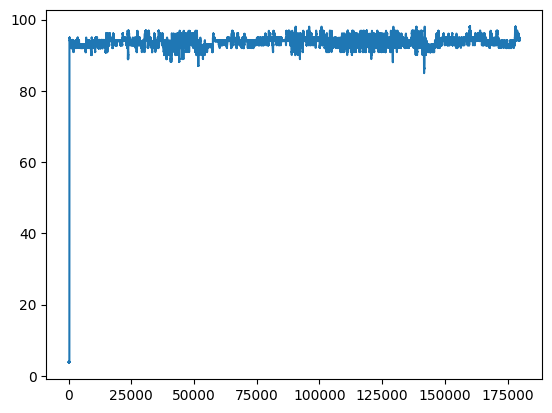

In [8]:
channel_index = record.sig_name.index("SpO2")
channel_data = record.p_signal[:, channel_index]
plt.plot(np.arange(len(channel_data)), channel_data)

In [4]:
intervals = []
for i in range(0, len(channel_data) - 88 + 1):
    curr_interval = channel_data[i:i + 88]
    intervals.append(curr_interval)
spo2_intervals = np.stack(intervals, axis=0)

In [5]:
spo2_df = pd.DataFrame(spo2_intervals, columns=np.arange(1, 89, 1))
spo2_df["start_time_plus_5.5"] = spo2_df.index + 5.5
spo2_df["apnea"] = False

In [6]:
ann_fp = "vincent-apnea-ecg/ucddb002_respevt.txt"

timestamps = []
with open(ann_fp, 'r', encoding='utf-8') as file:
    for line in file:
        if "Change" in line:
            break


    for line in file:
        if line == "\x1a":
            continue
        fields = line.split()
        timestamp = fields[0]
        duration = fields[2]

        h, m, s = timestamp.split(':')
        h, m, s = int(h), int(m), int(s)

        timestamp_sec = h * 3600 + m * 60 + s
        timestamps.append((timestamp_sec, int(duration)))

In [10]:
for timestamp in timestamps:
    spo2_df["apnea"] = (spo2_df["apnea"]) | ((spo2_df["start_time_plus_5.5"] >= timestamp[0]) & (spo2_df["start_time_plus_5.5"] <= timestamp[0] + timestamp[1]))
spo2_df.drop("start_time_plus_5.5", axis=1)
spo2_df.to_csv(f"vincent_processed_data/{file}.csv", index=False)


,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,apnea
0,3.861050,3.884737,3.861050,3.837363,3.861050,3.861050,3.861050,3.884737,3.766300,3.884737,...,3.884737,3.861050,3.884737,3.884737,3.884737,3.813675,3.884737,3.861050,3.884737,False
1,3.884737,3.861050,3.837363,3.861050,3.861050,3.861050,3.884737,3.766300,3.884737,3.861050,...,3.861050,3.884737,3.884737,3.884737,3.813675,3.884737,3.861050,3.884737,3.884737,False
2,3.861050,3.837363,3.861050,3.861050,3.861050,3.884737,3.766300,3.884737,3.861050,3.884737,...,3.884737,3.884737,3.884737,3.813675,3.884737,3.861050,3.884737,3.884737,3.861050,False
3,3.837363,3.861050,3.861050,3.861050,3.884737,3.766300,3.884737,3.861050,3.884737,3.861050,...,3.884737,3.884737,3.813675,3.884737,3.861050,3.884737,3.884737,3.861050,3.837363,False
4,3.861050,3.861050,3.861050,3.884737,3.766300,3.884737,3.861050,3.884737,3.861050,3.884737,...,3.884737,3.813675,3.884737,3.861050,3.884737,3.884737,3.861050,3.837363,3.884737,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179668,94.749695,94.820757,94.820757,94.820757,94.820757,94.820757,94.820757,94.797070,94.820757,94.844444,...,94.062759,93.968010,94.015385,94.062759,94.015385,94.062759,94.015385,94.015385,94.110134,False
179669,94.820757,94.820757,94.820757,94.820757,94.820757,94.820757,94.797070,94.820757,94.844444,94.844444,...,93.968010,94.015385,94.062759,94.015385,94.062759,94.015385,94.015385,94.110134,94.086447,False
179670,94.820757,94.820757,94.820757,94.820757,94.820757,94.797070,94.820757,94.844444,94.844444,94.797070,...,94.015385,94.062759,94.015385,94.062759,94.015385,94.015385,94.110134,94.086447,94.086447,False
179671,94.820757,94.820757,94.820757,94.820757,94.797070,94.820757,94.844444,94.844444,94.797070,94.844444,...,94.062759,94.015385,94.062759,94.015385,94.015385,94.110134,94.086447,94.086447,94.110134,False
